In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
#Set the random seed
np.random.seed(1)
#Sample 252 random number that are uniform from 0 to 1
print(np.random.normal(0,1, 252))

[ 1.62434536e+00 -6.11756414e-01 -5.28171752e-01 -1.07296862e+00
  8.65407629e-01 -2.30153870e+00  1.74481176e+00 -7.61206901e-01
  3.19039096e-01 -2.49370375e-01  1.46210794e+00 -2.06014071e+00
 -3.22417204e-01 -3.84054355e-01  1.13376944e+00 -1.09989127e+00
 -1.72428208e-01 -8.77858418e-01  4.22137467e-02  5.82815214e-01
 -1.10061918e+00  1.14472371e+00  9.01590721e-01  5.02494339e-01
  9.00855949e-01 -6.83727859e-01 -1.22890226e-01 -9.35769434e-01
 -2.67888080e-01  5.30355467e-01 -6.91660752e-01 -3.96753527e-01
 -6.87172700e-01 -8.45205641e-01 -6.71246131e-01 -1.26645989e-02
 -1.11731035e+00  2.34415698e-01  1.65980218e+00  7.42044161e-01
 -1.91835552e-01 -8.87628964e-01 -7.47158294e-01  1.69245460e+00
  5.08077548e-02 -6.36995647e-01  1.90915485e-01  2.10025514e+00
  1.20158952e-01  6.17203110e-01  3.00170320e-01 -3.52249846e-01
 -1.14251820e+00 -3.49342722e-01 -2.08894233e-01  5.86623191e-01
  8.38983414e-01  9.31102081e-01  2.85587325e-01  8.85141164e-01
 -7.54397941e-01  1.25286

In [2]:
#If we multiply 252 by 10 and then re-shape it into an array with dimensions of 252 x 10
np.random.seed(1)
print(np.random.normal(0,1, 252 * 10).reshape(252,10))

[[ 1.62434536 -0.61175641 -0.52817175 ... -0.7612069   0.3190391
  -0.24937038]
 [ 1.46210794 -2.06014071 -0.3224172  ... -0.87785842  0.04221375
   0.58281521]
 [-1.10061918  1.14472371  0.90159072 ... -0.93576943 -0.26788808
   0.53035547]
 ...
 [ 0.60297902 -1.34917521 -0.54697191 ... -0.22261241  0.68959282
  -0.24779751]
 [ 1.08395198 -0.01309541 -0.59467626 ... -1.27187358  1.04015274
  -0.09176419]
 [-0.83144508 -1.31909123  0.54899513 ...  0.58118494 -0.61464092
   0.12034243]]


In [3]:
#Now, we are going to using this for random returns, this first step gets us z-scores
np.random.seed(1)
returns = pd.DataFrame(np.random.normal(0,1, 252 * 10).reshape(252, 10))
print(returns)

            0         1         2         3         4         5         6  \
0    1.624345 -0.611756 -0.528172 -1.072969  0.865408 -2.301539  1.744812   
1    1.462108 -2.060141 -0.322417 -0.384054  1.133769 -1.099891 -0.172428   
2   -1.100619  1.144724  0.901591  0.502494  0.900856 -0.683728 -0.122890   
3   -0.691661 -0.396754 -0.687173 -0.845206 -0.671246 -0.012665 -1.117310   
4   -0.191836 -0.887629 -0.747158  1.692455  0.050808 -0.636996  0.190915   
..        ...       ...       ...       ...       ...       ...       ...   
247  2.014649  0.586885 -0.999110  1.046015  2.063185  1.274668 -0.584611   
248  0.029216 -1.005689 -0.875239  0.320819 -0.563622 -0.204385  2.148178   
249  0.602979 -1.349175 -0.546972 -0.262254 -0.446627 -0.202909  0.159902   
250  1.083952 -0.013095 -0.594676 -1.251391 -0.769384 -0.254311  1.202059   
251 -0.831445 -1.319091  0.548995 -1.906233 -0.461513 -0.440362 -0.163125   

            7         8         9  
0   -0.761207  0.319039 -0.249370  
1  

In [4]:
#Set the variables
rf = .02
timestep = 1/252
sigma = .08

#Turn the z-scores to returns
returns = returns * sigma * timestep ** .5 + (rf-.5 * sigma ** 2) * timestep
print(returns)

            0             1         2         3         4         5         6  \
0    0.008253 -3.016296e-03 -0.002595 -0.005341  0.004428 -0.011532  0.008860   
1    0.007435 -1.031547e-02 -0.001558 -0.001869  0.005780 -0.005476 -0.000802   
2   -0.005480  5.835532e-03  0.004610  0.002599  0.004607 -0.003379 -0.000553   
3   -0.003419 -1.932783e-03 -0.003396 -0.004193 -0.003316  0.000003 -0.005564   
4   -0.000900 -4.406563e-03 -0.003699  0.008596  0.000323 -0.003143  0.001029   
..        ...           ...       ...       ...       ...       ...       ...   
247  0.010220  3.024288e-03 -0.004968  0.005338  0.010464  0.006490 -0.002879   
248  0.000214 -5.001531e-03 -0.004344  0.001683 -0.002774 -0.000963  0.010892   
249  0.003105 -6.732537e-03 -0.002690 -0.001255 -0.002184 -0.000956  0.000872   
250  0.005529  6.719967e-07 -0.002930 -0.006240 -0.003811 -0.001215  0.006124   
251 -0.004123 -6.580928e-03  0.002833 -0.009540 -0.002259 -0.002153 -0.000755   

            7         8    

In [5]:
#Second part of the conversion to returns
returns = np.exp(returns)
print(returns)

            0         1         2         3         4         5         6  \
0    1.008287  0.996988  0.997408  0.994674  1.004438  0.988534  1.008899   
1    1.007463  0.989738  0.998443  0.998133  1.005797  0.994539  0.999198   
2    0.994535  1.005853  1.004621  1.002602  1.004617  0.996627  0.999448   
3    0.996587  0.998069  0.996609  0.995816  0.996689  1.000003  0.994451   
4    0.999100  0.995603  0.996308  1.008633  1.000323  0.996861  1.001029   
..        ...       ...       ...       ...       ...       ...       ...   
247  1.010272  1.003029  0.995044  1.005352  1.010519  1.006512  0.997125   
248  1.000214  0.995011  0.995665  1.001685  0.997230  0.999037  1.010952   
249  1.003110  0.993290  0.997314  0.998746  0.997818  0.999045  1.000873   
250  1.005545  1.000001  0.997074  0.993780  0.996197  0.998786  1.006143   
251  0.995885  0.993441  1.002837  0.990506  0.997743  0.997850  0.999245   

            7         8         9  
0    0.996238  1.001676  0.998811  
1  

In [6]:
#Using cumprod will give us the cummulative product which can be used to track the total return at each point
returns = returns.cumprod()
print(returns)

            0         1         2         3         4         5         6  \
0    1.008287  0.996988  0.997408  0.994674  1.004438  0.988534  1.008899   
1    1.015811  0.986757  0.995855  0.992817  1.010261  0.983136  1.008090   
2    1.010260  0.992532  1.000457  0.995400  1.014925  0.979819  1.007533   
3    1.006812  0.990615  0.997065  0.991235  1.011565  0.979822  1.001943   
4    1.005906  0.986260  0.993384  0.999793  1.011892  0.976747  1.002974   
..        ...       ...       ...       ...       ...       ...       ...   
247  1.044529  1.017985  1.039733  1.139018  0.958888  0.974131  1.152974   
248  1.044753  1.012907  1.035226  1.140937  0.956232  0.973193  1.165601   
249  1.048002  1.006110  1.032445  1.139506  0.954145  0.972263  1.166618   
250  1.053813  1.006111  1.029424  1.132418  0.950516  0.971083  1.173785   
251  1.049476  0.999511  1.032345  1.121666  0.948371  0.968995  1.172899   

            7         8         9  
0    0.996238  1.001676  0.998811  
1  

In [7]:
#Shift the index forward by 1
returns.index = returns.index + 1
print(returns)

            0         1         2         3         4         5         6  \
1    1.008287  0.996988  0.997408  0.994674  1.004438  0.988534  1.008899   
2    1.015811  0.986757  0.995855  0.992817  1.010261  0.983136  1.008090   
3    1.010260  0.992532  1.000457  0.995400  1.014925  0.979819  1.007533   
4    1.006812  0.990615  0.997065  0.991235  1.011565  0.979822  1.001943   
5    1.005906  0.986260  0.993384  0.999793  1.011892  0.976747  1.002974   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.044529  1.017985  1.039733  1.139018  0.958888  0.974131  1.152974   
249  1.044753  1.012907  1.035226  1.140937  0.956232  0.973193  1.165601   
250  1.048002  1.006110  1.032445  1.139506  0.954145  0.972263  1.166618   
251  1.053813  1.006111  1.029424  1.132418  0.950516  0.971083  1.173785   
252  1.049476  0.999511  1.032345  1.121666  0.948371  0.968995  1.172899   

            7         8         9  
1    0.996238  1.001676  0.998811  
2  

In [8]:
#Set the value at 0, the beginning to be 1
returns.loc[0] = 1
returns = returns.sort_index()
print(returns)

            0         1         2         3         4         5         6  \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.008287  0.996988  0.997408  0.994674  1.004438  0.988534  1.008899   
2    1.015811  0.986757  0.995855  0.992817  1.010261  0.983136  1.008090   
3    1.010260  0.992532  1.000457  0.995400  1.014925  0.979819  1.007533   
4    1.006812  0.990615  0.997065  0.991235  1.011565  0.979822  1.001943   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.044529  1.017985  1.039733  1.139018  0.958888  0.974131  1.152974   
249  1.044753  1.012907  1.035226  1.140937  0.956232  0.973193  1.165601   
250  1.048002  1.006110  1.032445  1.139506  0.954145  0.972263  1.166618   
251  1.053813  1.006111  1.029424  1.132418  0.950516  0.971083  1.173785   
252  1.049476  0.999511  1.032345  1.121666  0.948371  0.968995  1.172899   

            7         8         9  
0    1.000000  1.000000  1.000000  
1  

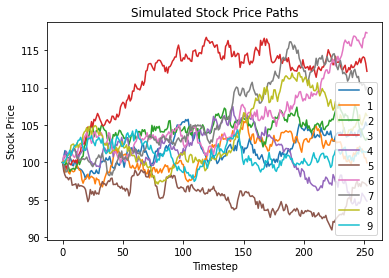

In [9]:
import matplotlib.pyplot as plt

#Now we can plot simulated stock paths, multiply in the starting stock price of $100
returns = returns * 100
returns.plot(kind='line')
plt.xlabel("Timestep")
plt.ylabel("Stock Price")
plt.title("Simulated Stock Price Paths")
plt.show()

In [10]:
#Set a new parameter, runs which allows us to toggle the number of simulations
rf = .02
time_step = 1/252
price0 = 100
sigma = .08
runs = 100000
periods = 252

#Build a function to wrap everything in a function
def simulate_returns(price0, rf, time_step, periods, sigma):
    returns = pd.DataFrame(np.random.normal(0,1, periods * runs).reshape(periods, runs))
    returns = returns * sigma * timestep ** .5 + (rf - .5 * sigma ** 2) * timestep
    returns = np.exp(returns).cumprod()
    returns.index = returns.index + 1
    returns.loc[0] = 1
    returns = returns.sort_index()
    paths = returns * price0
    return paths
np.random.seed(1)
paths = simulate_returns(price0, rf, time_step, periods, sigma)
print(paths)

          0           1           2           3           4           5      \
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1    100.828674   99.698825   99.740830   99.467365  100.443773   98.853424   
2     99.697424  100.010275  100.344120   99.639056  100.482821   99.187516   
3     99.309747  101.113161   99.982633  100.411574  100.230710   99.216487   
4     99.464300  100.601262   99.843354  100.829567  100.971966   99.459033   
..          ...         ...         ...         ...         ...         ...   
248  110.812363  106.827300   95.733298  102.099819   96.165776   99.984639   
249  111.489619  105.785024   94.993773  102.266445   95.991783  100.577921   
250  112.080978  106.808564   95.065350  102.023106   95.549661  100.492074   
251  113.108997  105.710578   95.470361  102.018444   94.966583  100.056261   
252  112.572530  104.904307   95.714811  101.993978   95.576788  100.676684   

          6           7           8           9    

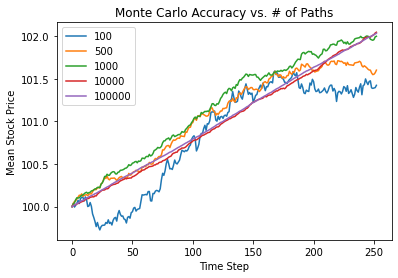

In [11]:
#Compare the accuracy with different number of simulations
mean_path = [paths.iloc[:,:x].mean(axis=1) for x in [100, 500, 1000, 10000, 100000]]
mean_path = pd.concat(mean_path, axis=1)
mean_path.columns = [100, 500, 1000, 10000, 100000]
mean_path.plot(kind='line')
plt.xlabel("Time Step")
plt.ylabel("Mean Stock Price")
plt.title("Monte Carlo Accuracy vs. # of Paths")
plt.show()

In [12]:
#Recall the black-scholes formula
def black_scholes(S, X, sigma, rf, t):
    d1 = 1/(sigma*t**.5) * (np.log(S/X)  + (rf + sigma **2 /2) * t)
    d2 = d1 - sigma * t**.5
    return norm.cdf(d1) * S - norm.cdf(d2) * X * np.exp(-rf*t)
print(black_scholes(100, 110, .08, .02, 1))

0.7724986768008932


In [13]:
#Note the call option will be valued about the same
print(paths.iloc[-1].apply(lambda x: max(x-110, 0)).mean() / np.exp(.02 * 1))

0.7700300709351346


In [14]:
#You can confirm with a different strike price of $100
print(black_scholes(100, 100, .08, .02, 1))
print(paths.iloc[-1].apply(lambda x: max(x-100, 0)).mean() / np.exp(.02))

4.247318143599706
4.249547512830326


In [15]:
#For a jump model, the first step is to make a uniform distribution
np.random.seed(1)
dummy = pd.DataFrame(np.random.uniform(0,1,252*10).reshape(252,10))
print(dummy)

            0         1         2         3         4         5         6  \
0    0.417022  0.720324  0.000114  0.302333  0.146756  0.092339  0.186260   
1    0.419195  0.685220  0.204452  0.878117  0.027388  0.670468  0.417305   
2    0.800745  0.968262  0.313424  0.692323  0.876389  0.894607  0.085044   
3    0.098347  0.421108  0.957890  0.533165  0.691877  0.315516  0.686501   
4    0.988861  0.748166  0.280444  0.789279  0.103226  0.447894  0.908596   
..        ...       ...       ...       ...       ...       ...       ...   
247  0.486425  0.699147  0.394987  0.797496  0.786417  0.155529  0.317818   
248  0.041687  0.659970  0.201632  0.416463  0.450893  0.348727  0.383280   
249  0.595867  0.145500  0.230942  0.286377  0.830751  0.153421  0.552139   
250  0.959112  0.553344  0.652731  0.490740  0.646650  0.605251  0.145173   
251  0.363073  0.228142  0.847503  0.341474  0.226789  0.408181  0.683064   

            7         8         9  
0    0.345561  0.396767  0.538817  
1  

In [16]:
#Then we can convert it into dummy variables of 0 or 1 where 1 means there is a jump and 0 means no jump
threshold = .5
time_step = 1/252
dummy = (dummy < (threshold * time_step)).astype(int)
print(dummy)

     0  1  2  3  4  5  6  7  8  9
0    0  0  1  0  0  0  0  0  0  0
1    0  0  0  0  0  0  0  0  0  0
2    0  0  0  0  0  0  0  0  0  0
3    0  0  0  0  0  0  0  0  0  0
4    0  0  0  0  0  0  0  0  0  0
..  .. .. .. .. .. .. .. .. .. ..
247  0  0  0  0  0  0  0  0  0  0
248  0  0  0  0  0  0  0  0  0  0
249  0  0  0  0  0  0  0  0  0  0
250  0  0  0  0  0  0  0  0  0  0
251  0  0  0  0  0  0  0  0  0  0

[252 rows x 10 columns]


In [17]:
#Note how rare jumps are
print(dummy.sum())

0    2
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    1
dtype: int64


In [18]:
#Multiply in random jumps
#In the third column, we have a jump of >11% which is represented as a factor of .88 multiplied in
np.random.seed(5)
jump = np.exp(pd.DataFrame(np.random.normal(0,1, 252*10).reshape(252,10)) *.2 - .2**2 /2) * dummy
print(jump)

       0    1         2    3    4    5    6    7    8    9
0    0.0  0.0  1.593853  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...       ...  ...  ...  ...  ...  ...  ...  ...
247  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
248  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
249  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
250  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
251  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[252 rows x 10 columns]


In [19]:
#Let's make this into something we can add on
np.random.seed(5)
jump = np.exp(pd.DataFrame(np.random.normal(0,1, 252*10).reshape(252,10)) *.2- .2**2 /2) * dummy
#Set anything without a jump to null then subtract 1 from all jumps
jump = jump.where(jump != 0) - 1
#Fill the null values with 0 because there is no change to the regular returns because there is no jump
jump = jump.fillna(0)
print(jump)

       0    1         2    3    4    5    6    7    8    9
0    0.0  0.0  0.593853  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...       ...  ...  ...  ...  ...  ...  ...  ...
247  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
248  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
249  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
250  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0
251  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[252 rows x 10 columns]


In [20]:
#Convert the first 10 paths to returns
pct_returns = paths.iloc[:,:10].pct_change().dropna()
#Reset the index so the jump and regular returns are aligned
pct_returns.index = list(range(len(pct_returns.index)))
print(pct_returns)

            0         1         2         3         4         5         6  \
0    0.008287 -0.003012 -0.002592 -0.005326  0.004438 -0.011466  0.008899   
1   -0.011220  0.003124  0.006049  0.001726  0.000389  0.003380  0.001226   
2   -0.003889  0.011028 -0.003602  0.007753 -0.002509  0.000292  0.003701   
3    0.001556 -0.005063 -0.001393  0.004163  0.007395  0.002445  0.004198   
4   -0.000147 -0.006027  0.012161  0.006435  0.007239 -0.004479 -0.005246   
..        ...       ...       ...       ...       ...       ...       ...   
247 -0.002025  0.003518  0.004734  0.000091 -0.011416 -0.001728 -0.011317   
248  0.006112 -0.009757 -0.007725  0.001632 -0.001809  0.005934 -0.005711   
249  0.005304  0.009676  0.000753 -0.002379 -0.004606 -0.000854 -0.000169   
250  0.009172 -0.010280  0.004260 -0.000046 -0.006102 -0.004337 -0.000565   
251 -0.004743 -0.007627  0.002560 -0.000240  0.006425  0.006201 -0.001794   

            7         8         9  
0   -0.003762  0.001676 -0.001189  
1  

In [21]:
#Add the two returns
pct_returns = pct_returns + jump

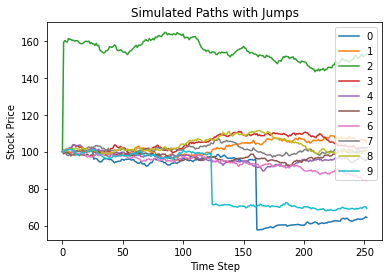

In [22]:
prices = (pct_returns + 1).cumprod()
prices.index = prices.index + 1
prices.loc[0] = 1
prices = prices.sort_index()
prices = prices * 100
prices.plot(kind='line')
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.title("Simulated Paths with Jumps")
plt.show()

In [23]:
rf = .02
time_step = 1/252
price0 = 100
sigma = .08
runs = 100000
periods = 252
jump_sigma = .2
jump_prob = .5

def simulate_returns(price0, rf, time_step, periods, sigma):
    returns = pd.DataFrame(np.random.normal(0,1, periods * runs).reshape(periods, runs))
    returns = returns * sigma * timestep ** .5 + (rf - .5 * sigma ** 2) * timestep
    returns = np.exp(returns).cumprod()
    returns.index = returns.index + 1
    returns.loc[0] = 1
    returns = returns.sort_index()
    paths = returns * price0
    return paths
np.random.seed(0)
paths1 = simulate_returns(price0, rf, time_step, periods, sigma)

def simulate_returns_with_jump(price0, rf, time_step, periods, sigma, jump_sigma, jump_prob):
    returns = pd.DataFrame(np.random.normal(0,1, periods * runs).reshape(periods, runs))
    returns = returns * sigma * timestep ** .5 + (rf - .5 * sigma ** 2) * timestep
    
    threshold = jump_prob * time_step
    dummy = pd.DataFrame(np.random.uniform(0,1, periods * runs).reshape(periods, runs))
    dummy = (dummy < threshold).astype(int)
    jump = np.random.normal(0,1, periods * runs).reshape(periods, runs) *jump_sigma- jump_sigma**2 /2
    jump = jump * dummy
    returns = returns + jump
    
    returns = np.exp(returns).cumprod()
    returns.index = returns.index + 1
    returns.loc[0] = 1
    returns = returns.sort_index()
    paths = returns * price0
    return paths
np.random.seed(0)
paths2 = simulate_returns_with_jump(price0, rf, time_step, periods, sigma, jump_sigma, jump_prob)

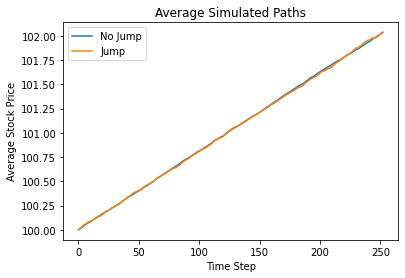

In [24]:
pd.concat([paths1.mean(axis=1), paths2.mean(axis=1)], axis=1).plot(kind='line')
plt.legend(['No Jump', 'Jump'])
plt.xlabel("Time Step")
plt.ylabel("Average Stock Price")
plt.title("Average Simulated Paths")
plt.show()

In [25]:
#Compare volatilities
vol1 = np.log(paths1.pct_change() + 1).std() * 252 ** .5
print(vol1.mean())
vol2 = np.log(paths2.pct_change() + 1).std() * 252 ** .5
print(vol2.mean())

0.07989306549691123
0.1305261817382002


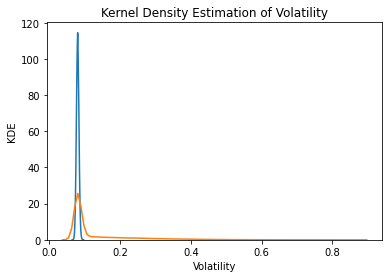

In [26]:
import seaborn as sns
sns.kdeplot(vol1)
sns.kdeplot(vol2)

plt.xlabel("Volatility")
plt.ylabel("KDE")
plt.title("Kernel Density Estimation of Volatility")
plt.show()

In [27]:
#Value call options
print(paths1.iloc[-1].apply(lambda x: max(x-100, 0)).mean() / np.exp(.02))
print(paths2.iloc[-1].apply(lambda x: max(x-100, 0)).mean() / np.exp(.02))

4.252839740652764
6.622495943801756
